<h1>Tutorial: Load datetime, timezone change and aggregation</h1>

In [66]:
import pandas as pd

In [67]:
# Specifically indicate which column is datetime in order to recognize datetime
df_date = pd.read_csv('../input/timeseries.txt',index_col=0, parse_dates=[1])

In [68]:
# the date is datetime64[ns], otherwise date is just object type.
df_date.dtypes

date         datetime64[ns]
door_open             int64
dtype: object

In [69]:
df_date.head()

,date,door_open
temp,,
25,2014-01-22 13:11:22,1
33,2014-01-22 13:13:33,1
23,2014-01-22 13:15:33,1
22,2017-12-07 02:22:34,1
32,2017-12-07 02:34:00,1


In [70]:
# After setting up to UTC and then convert to Asia/Seoul
df_date['seoul_date'] = df_date.date.dt.tz_localize('UTC').dt.tz_convert('Asia/Seoul')

In [71]:
df_date.head(10)

,date,door_open,seoul_date
temp,,,
25,2014-01-22 13:11:22,1,2014-01-22 22:11:22+09:00
33,2014-01-22 13:13:33,1,2014-01-22 22:13:33+09:00
23,2014-01-22 13:15:33,1,2014-01-22 22:15:33+09:00
22,2017-12-07 02:22:34,1,2017-12-07 11:22:34+09:00
32,2017-12-07 02:34:00,1,2017-12-07 11:34:00+09:00
10,2017-12-07 22:33:01,1,2017-12-08 07:33:01+09:00
12,2017-12-07 23:11:02,1,2017-12-08 08:11:02+09:00
13,2017-12-07 23:12:03,1,2017-12-08 08:12:03+09:00


In [72]:
# Truncate minutes and seconds, leaving yyyy-mm-dd hh
df_date['seoul_date_hour'] = df_date.seoul_date.dt.strftime('%Y-%m-%d %H:00:00')

In [73]:
df_date.head(10)

,date,door_open,seoul_date,seoul_date_hour
temp,,,,
25,2014-01-22 13:11:22,1,2014-01-22 22:11:22+09:00,2014-01-22 22:00:00
33,2014-01-22 13:13:33,1,2014-01-22 22:13:33+09:00,2014-01-22 22:00:00
23,2014-01-22 13:15:33,1,2014-01-22 22:15:33+09:00,2014-01-22 22:00:00
22,2017-12-07 02:22:34,1,2017-12-07 11:22:34+09:00,2017-12-07 11:00:00
32,2017-12-07 02:34:00,1,2017-12-07 11:34:00+09:00,2017-12-07 11:00:00
10,2017-12-07 22:33:01,1,2017-12-08 07:33:01+09:00,2017-12-08 07:00:00
12,2017-12-07 23:11:02,1,2017-12-08 08:11:02+09:00,2017-12-08 08:00:00
13,2017-12-07 23:12:03,1,2017-12-08 08:12:03+09:00,2017-12-08 08:00:00


In [74]:
df_date.dtypes

date                           datetime64[ns]
door_open                               int64
seoul_date         datetime64[ns, Asia/Seoul]
seoul_date_hour                        object
dtype: object

In [75]:
# aggregate by hour
df_d_open = df_date.groupby('seoul_date_hour').agg({'door_open':sum})
df_d_open.head(10)


,door_open
seoul_date_hour,
2014-01-22 22:00:00,3
2017-12-07 11:00:00,2
2017-12-08 07:00:00,1
2017-12-08 08:00:00,2


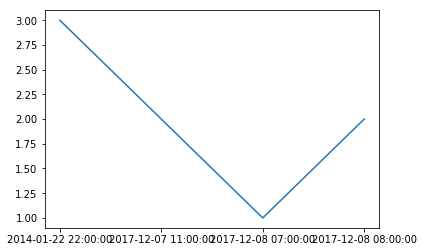

In [76]:
# draw a plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df_d_open)
plt.show()

Ref:<br>
Summarising, Aggregating, and Grouping data in Python Pandas, https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/